# 1 - Exploración Preliminar y Validación Estructural

Resumen del Notebook anterior (`00_data_ingestion_ipynb`):

- Fueron identificadas las fuentes de datos originales: `ventas`, `clientes`, `inventario`, `marketing` y `web_data`.
- Fueron convertidos correctamente a formatos `.csv` en la carpeta `../data/raw_converted`.
- Fue verificada la estructura base de los archivos y fue confirmada su integridad.
- No se han implementado limpiezas todavía; solamente una conversión e inspección inicial.

Objetivo de este cuaderno:

Realizar una inspección inicial de la información para:
- Conocer la estructura de cada dataset.
- Detectar problemas base (valores nulos, duplicados, tipos incorrectos).
- Generar visualizaciones simples para apoyar la toma de decisiones de limpieza ulteriores.
- Dejar preparado el diagnóstico para el `Notebook 2` (limpieza y normalización).

Todas las figuras generadas van a ser guardadas en:
`../reports/figures/raw`

## 1. Importación de librerías y creación de carpetas para las figuras

In [49]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ajuste de figuras
plt.style.use('default')

# Rutas de los archivos
DATA_PATH = "../data/raw_converted"
FIGURES_PATH = "../reports/figures/raw"

# Crear la carpeta de figuras si no existe
os.makedirs(FIGURES_PATH, exist_ok=True)

print("Rutas preparadas.")

Rutas preparadas.


## 2. Carga automática de datasets

In [50]:
datasets = {}
for file in os.listdir(DATA_PATH):
    if file.endswith('.csv'):
        name = file.replace(".csv", "")
        df = pd.read_csv(os.path.join(DATA_PATH, file))
        datasets[name] = df
        print(f"Cargado: {name} con {df.shape[0]} filas y {df.shape[1]} columnas.")

list(datasets.keys())

Cargado: clientes con 300 filas y 7 columnas.
Cargado: inventario con 8 filas y 6 columnas.
Cargado: marketing con 150 filas y 9 columnas.
Cargado: ventas con 1000 filas y 9 columnas.
Cargado: web_data con 800 filas y 9 columnas.


['clientes', 'inventario', 'marketing', 'ventas', 'web_data']

## 3. Función de inspección estructural

In [51]:
def revisar_dataset(nombre, df):
    print("="*80)
    print(f"Dataset: {nombre}")
    print("="*80)

    print("\nPrimeras filas:")
    display(df.head())

    print("\nInformación del Dataset:")
    df.info()

    print("\nEstadísticas descriptivas numéricas:")
    display(df.describe())

    print("\nValores nulos por columna:")
    display(df.isnull().sum())

    print("\nDuplicados:")
    print(df.duplicated().sum())

    print("\n--- Fin de la revisión ---\n")

## 4. Revisión de todos los datasets

In [52]:
for nombre, df in datasets.items():
    revisar_dataset(nombre, df)

Dataset: clientes

Primeras filas:


,Cliente ID,Edad,Región,Fecha Encuesta,Línea Usada,Satisfacción (1-5),Comentarios
0,10000,27,Oeste,2025-04-14,Línea Orgánica,2,Precio elevado
1,10001,45,Norte,2025-03-04,Línea Profesional,4,Muy buen aroma
2,10002,22,Este,2025-03-12,Línea Profesional,4,Excelente producto
3,10003,19,Norte,2025-02-05,Línea Orgánica,1,No vi resultados
4,10004,25,Sur,2025-02-17,Línea Orgánica,5,No vi resultados



Información del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Cliente ID          300 non-null    int64 
 1   Edad                300 non-null    int64 
 2   Región              300 non-null    object
 3   Fecha Encuesta      300 non-null    object
 4   Línea Usada         300 non-null    object
 5   Satisfacción (1-5)  300 non-null    int64 
 6   Comentarios         300 non-null    object
dtypes: int64(3), object(4)
memory usage: 16.5+ KB

Estadísticas descriptivas numéricas:


,Cliente ID,Edad,Satisfacción (1-5)
count,300.000000,300.000000,300.000000
mean,10149.500000,31.936667,3.036667
std,86.746758,8.004973,1.429031
min,10000.000000,18.000000,1.000000
25%,10074.750000,25.000000,2.000000
50%,10149.500000,32.000000,3.000000
75%,10224.250000,38.000000,4.000000
max,10299.000000,45.000000,5.000000



Valores nulos por columna:


Cliente ID            0
Edad                  0
Región                0
Fecha Encuesta        0
Línea Usada           0
Satisfacción (1-5)    0
Comentarios           0
dtype: int64


Duplicados:
0

--- Fin de la revisión ---

Dataset: inventario

Primeras filas:


,SKU,Nombre Producto,Stock Actual,Stock Ideal,Devoluciones (Último mes),Motivo Devolución
0,LJ-001,Crema Joven,97,231,10,No era lo esperado
1,LJ-002,Loción Joven,150,336,18,No era lo esperado
2,LJ-003,Serum Joven,219,333,5,Envase dañado
3,LP-001,Serum Profesional,181,282,7,Envase dañado
4,LP-002,Serum Profesional,57,220,17,No era lo esperado



Información del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   SKU                        8 non-null      object
 1   Nombre Producto            8 non-null      object
 2   Stock Actual               8 non-null      int64 
 3   Stock Ideal                8 non-null      int64 
 4   Devoluciones (Último mes)  8 non-null      int64 
 5   Motivo Devolución          8 non-null      object
dtypes: int64(3), object(3)
memory usage: 516.0+ bytes

Estadísticas descriptivas numéricas:


,Stock Actual,Stock Ideal,Devoluciones (Último mes)
count,8.000000,8.00000,8.000000
mean,143.875000,260.87500,11.500000
std,62.983983,66.18683,4.869732
min,57.000000,144.00000,5.000000
25%,94.750000,228.25000,8.500000
50%,139.000000,257.00000,10.000000
75%,190.500000,315.00000,16.250000
max,231.000000,336.00000,18.000000



Valores nulos por columna:


SKU                          0
Nombre Producto              0
Stock Actual                 0
Stock Ideal                  0
Devoluciones (Último mes)    0
Motivo Devolución            0
dtype: int64


Duplicados:
0

--- Fin de la revisión ---

Dataset: marketing

Primeras filas:


,Fecha,Canal,Campaña,Línea Asociada,Inversión USD,CPM,CPC,CTR (%),Conversiones
0,2024-08-08,TikTok,Ti_LJ_20s,Línea Joven,2957,201,139,57,12
1,2024-10-12,Facebook,Fa_LJ_2025,Línea Joven,2867,339,57,244,122
2,2024-06-13,TikTok,Ti_LJ_fresh,Línea Joven,2952,41,88,16,53
3,2024-11-25,Google,Go_LJ_2025,Línea Joven,4642,464,134,131,45
4,2024-07-03,Facebook,Fa_LJ_fresh,Línea Joven,2412,212,142,125,21



Información del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fecha           150 non-null    object
 1   Canal           150 non-null    object
 2   Campaña         150 non-null    object
 3   Línea Asociada  150 non-null    object
 4   Inversión USD   150 non-null    int64 
 5   CPM             150 non-null    int64 
 6   CPC             150 non-null    int64 
 7   CTR (%)         150 non-null    int64 
 8   Conversiones    150 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 10.7+ KB

Estadísticas descriptivas numéricas:


,Inversión USD,CPM,CPC,CTR (%),Conversiones
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,3234.440000,294.980000,90.293333,134.233333,54.586667
std,1679.757719,134.400457,39.137264,71.100592,43.905204
min,503.000000,22.000000,7.000000,6.000000,2.000000
25%,1701.250000,226.250000,64.000000,75.000000,21.250000
50%,3495.500000,305.500000,87.000000,134.000000,43.500000
75%,4724.000000,397.000000,127.000000,199.000000,75.000000
max,5969.000000,494.000000,149.000000,248.000000,206.000000



Valores nulos por columna:


Fecha             0
Canal             0
Campaña           0
Línea Asociada    0
Inversión USD     0
CPM               0
CPC               0
CTR (%)           0
Conversiones      0
dtype: int64


Duplicados:
0

--- Fin de la revisión ---

Dataset: ventas

Primeras filas:


,Fecha,Región,Canal,Línea de Producto,SKU,Unidades Vendidas,Precio Unitario,Descuento (%),Total Ingresos
0,2024-12-27,Norte,Red de Distribución,Línea Orgánica,LO-002,21,1757,0,36897
1,2024-10-22,Oeste,Directo,Línea Joven,LJ-003,1,2013,10,1812
2,2024-09-08,Este,Red de Distribución,Línea Profesional,LP-002,15,2245,5,31991
3,2024-05-16,Centro,Directo,Línea Profesional,LP-001,1,151,15,1283
4,2025-04-04,Centro,Directo,Línea Orgánica,LO-003,5,1486,15,6315



Información del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Fecha              1000 non-null   object
 1   Región             1000 non-null   object
 2   Canal              1000 non-null   object
 3   Línea de Producto  1000 non-null   object
 4   SKU                1000 non-null   object
 5   Unidades Vendidas  1000 non-null   int64 
 6   Precio Unitario    1000 non-null   int64 
 7   Descuento (%)      1000 non-null   int64 
 8   Total Ingresos     1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB

Estadísticas descriptivas numéricas:


,Unidades Vendidas,Precio Unitario,Descuento (%),Total Ingresos
count,1000.000000,1000.00000,1000.000000,1000.000000
mean,15.179000,1498.19500,7.240000,19680.591000
std,8.836234,653.45596,5.609266,16022.962778
min,1.000000,83.00000,0.000000,129.000000
25%,7.000000,1083.75000,0.000000,5507.250000
50%,15.000000,1561.50000,5.000000,16146.000000
75%,23.000000,2044.00000,10.000000,29913.750000
max,30.000000,2499.00000,15.000000,70025.000000



Valores nulos por columna:


Fecha                0
Región               0
Canal                0
Línea de Producto    0
SKU                  0
Unidades Vendidas    0
Precio Unitario      0
Descuento (%)        0
Total Ingresos       0
dtype: int64


Duplicados:
0

--- Fin de la revisión ---

Dataset: web_data

Primeras filas:


,Fecha,Región,Campaña,Canal Origen,Página Visitada,Tiempo en Página (s),Clic en Producto,Añadir al Carrito,Compra Completada
0,2024-12-11,Este,GoogleAds_Young,GoogleAds,Línea Joven - Serum,178,0,0,0
1,2024-12-24,Norte,Instagram_YZ,Instagram,Línea Joven - Serum,124,0,0,0
2,2024-07-12,Norte,GoogleAds_Young,GoogleAds,Línea Joven - Serum,73,1,0,0
3,2024-05-09,Centro,TikTok_LJ,TikTok,Línea Joven - Crema,31,1,0,0
4,2024-10-13,Sur,TikTok_LJ,TikTok,Línea Profesional - Crema,92,0,0,0



Información del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Fecha                 800 non-null    object
 1   Región                800 non-null    object
 2   Campaña               800 non-null    object
 3   Canal Origen          800 non-null    object
 4   Página Visitada       800 non-null    object
 5   Tiempo en Página (s)  800 non-null    int64 
 6   Clic en Producto      800 non-null    int64 
 7   Añadir al Carrito     800 non-null    int64 
 8   Compra Completada     800 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 56.4+ KB

Estadísticas descriptivas numéricas:


,Tiempo en Página (s),Clic en Producto,Añadir al Carrito,Compra Completada
count,800.000000,800.000000,800.000000,800.000000
mean,93.718750,0.293750,0.113750,0.053750
std,49.089555,0.455764,0.317706,0.225665
min,10.000000,0.000000,0.000000,0.000000
25%,50.000000,0.000000,0.000000,0.000000
50%,94.500000,0.000000,0.000000,0.000000
75%,135.000000,1.000000,0.000000,0.000000
max,180.000000,1.000000,1.000000,1.000000



Valores nulos por columna:


Fecha                   0
Región                  0
Campaña                 0
Canal Origen            0
Página Visitada         0
Tiempo en Página (s)    0
Clic en Producto        0
Añadir al Carrito       0
Compra Completada       0
dtype: int64


Duplicados:
0

--- Fin de la revisión ---



## 5. Corrección preliminar de tipos (fechas)


In [53]:
for nombre, df in datasets.items():
    for col in df.columns:
        if "fecha" in col.lower() or "date" in col.lower():
            try:
                df[col] = pd.to_datetime(df[col], errors='coerce')
                print(f"Columna '{col}' convertida a datetime en dataset '{nombre}'.")
            except:
                print(f"No se pudo convertir la columna '{col}' en dataset '{nombre}'.")

    print(f"\nTipos de datos en el dataset '{nombre}':")
    display(df.dtypes)

Columna 'Fecha Encuesta' convertida a datetime en dataset 'clientes'.

Tipos de datos en el dataset 'clientes':


Cliente ID                     int64
Edad                           int64
Región                        object
Fecha Encuesta        datetime64[ns]
Línea Usada                   object
Satisfacción (1-5)             int64
Comentarios                   object
dtype: object


Tipos de datos en el dataset 'inventario':


SKU                          object
Nombre Producto              object
Stock Actual                  int64
Stock Ideal                   int64
Devoluciones (Último mes)     int64
Motivo Devolución            object
dtype: object

Columna 'Fecha' convertida a datetime en dataset 'marketing'.

Tipos de datos en el dataset 'marketing':


Fecha             datetime64[ns]
Canal                     object
Campaña                   object
Línea Asociada            object
Inversión USD              int64
CPM                        int64
CPC                        int64
CTR (%)                    int64
Conversiones               int64
dtype: object

Columna 'Fecha' convertida a datetime en dataset 'ventas'.

Tipos de datos en el dataset 'ventas':


Fecha                datetime64[ns]
Región                       object
Canal                        object
Línea de Producto            object
SKU                          object
Unidades Vendidas             int64
Precio Unitario               int64
Descuento (%)                 int64
Total Ingresos                int64
dtype: object

Columna 'Fecha' convertida a datetime en dataset 'web_data'.

Tipos de datos en el dataset 'web_data':


Fecha                   datetime64[ns]
Región                          object
Campaña                         object
Canal Origen                    object
Página Visitada                 object
Tiempo en Página (s)             int64
Clic en Producto                 int64
Añadir al Carrito                int64
Compra Completada                int64
dtype: object

## 6. Verificación de rangos de fechas

In [54]:
for nombre, df in datasets.items():
    fechas = [c for c in df.columns if "fecha" in c.lower()]
    if fechas:
        for f in fechas:
            print(f"\nDataset: {nombre} — Columna: {f}")
            print("Min:", df[f].min())
            print("Max:", df[f].max())


Dataset: clientes — Columna: Fecha Encuesta
Min: 2024-05-02 00:00:00
Max: 2025-04-30 00:00:00

Dataset: marketing — Columna: Fecha
Min: 2024-05-05 00:00:00
Max: 2025-04-29 00:00:00

Dataset: ventas — Columna: Fecha
Min: 2024-05-01 00:00:00
Max: 2025-04-30 00:00:00

Dataset: web_data — Columna: Fecha
Min: 2024-05-01 00:00:00
Max: 2025-04-29 00:00:00


## 7. Exploración general de la estructura de cada dataset

Se verifica la forma, las columnas y los tipos de datos de todos los datasets.

In [55]:
for name, df in datasets.items():
    print(f"\n=== {name.upper()} ===")
    print(df.shape)
    print(df.dtypes)
    print(df.head())


=== CLIENTES ===
(300, 7)
Cliente ID                     int64
Edad                           int64
Región                        object
Fecha Encuesta        datetime64[ns]
Línea Usada                   object
Satisfacción (1-5)             int64
Comentarios                   object
dtype: object
   Cliente ID  Edad Región Fecha Encuesta        Línea Usada  \
0       10000    27  Oeste     2025-04-14     Línea Orgánica   
1       10001    45  Norte     2025-03-04  Línea Profesional   
2       10002    22   Este     2025-03-12  Línea Profesional   
3       10003    19  Norte     2025-02-05     Línea Orgánica   
4       10004    25    Sur     2025-02-17     Línea Orgánica   

   Satisfacción (1-5)         Comentarios  
0                   2      Precio elevado  
1                   4      Muy buen aroma  
2                   4  Excelente producto  
3                   1    No vi resultados  
4                   5    No vi resultados  

=== INVENTARIO ===
(8, 6)
SKU                     

## 8. Verificación incial de valores faltantes

Se detectan datasets que necesiten limpieza en el siguiente Notebook (Data Preparation)

In [56]:
for name, df in datasets.items():
    print(f"\n>>> {name.upper()} – Valores Faltantes")
    print(df.isna().sum())


>>> CLIENTES – Valores Faltantes
Cliente ID            0
Edad                  0
Región                0
Fecha Encuesta        0
Línea Usada           0
Satisfacción (1-5)    0
Comentarios           0
dtype: int64

>>> INVENTARIO – Valores Faltantes
SKU                          0
Nombre Producto              0
Stock Actual                 0
Stock Ideal                  0
Devoluciones (Último mes)    0
Motivo Devolución            0
dtype: int64

>>> MARKETING – Valores Faltantes
Fecha             0
Canal             0
Campaña           0
Línea Asociada    0
Inversión USD     0
CPM               0
CPC               0
CTR (%)           0
Conversiones      0
dtype: int64

>>> VENTAS – Valores Faltantes
Fecha                0
Región               0
Canal                0
Línea de Producto    0
SKU                  0
Unidades Vendidas    0
Precio Unitario      0
Descuento (%)        0
Total Ingresos       0
dtype: int64

>>> WEB_DATA – Valores Faltantes
Fecha                   0
Región    

## 9. Estadísticas Descriptivas Numéricas

Para `ventas`, `clientes`, `inventario`, `web_data`.

In [57]:
for name, df in datasets.items():
    print(f"\n--- {name.upper()} Descripción Numérica---")
    display(df.describe())


--- CLIENTES Descripción Numérica---


,Cliente ID,Edad,Fecha Encuesta,Satisfacción (1-5)
count,300.000000,300.000000,300,300.000000
mean,10149.500000,31.936667,2024-11-06 23:26:24,3.036667
min,10000.000000,18.000000,2024-05-02 00:00:00,1.000000
25%,10074.750000,25.000000,2024-08-04 18:00:00,2.000000
50%,10149.500000,32.000000,2024-11-16 12:00:00,3.000000
75%,10224.250000,38.000000,2025-02-05 12:00:00,4.000000
max,10299.000000,45.000000,2025-04-30 00:00:00,5.000000
std,86.746758,8.004973,NaN,1.429031



--- INVENTARIO Descripción Numérica---


,Stock Actual,Stock Ideal,Devoluciones (Último mes)
count,8.000000,8.00000,8.000000
mean,143.875000,260.87500,11.500000
std,62.983983,66.18683,4.869732
min,57.000000,144.00000,5.000000
25%,94.750000,228.25000,8.500000
50%,139.000000,257.00000,10.000000
75%,190.500000,315.00000,16.250000
max,231.000000,336.00000,18.000000



--- MARKETING Descripción Numérica---


,Fecha,Inversión USD,CPM,CPC,CTR (%),Conversiones
count,150,150.000000,150.000000,150.000000,150.000000,150.000000
mean,2024-11-01 16:48:00,3234.440000,294.980000,90.293333,134.233333,54.586667
min,2024-05-05 00:00:00,503.000000,22.000000,7.000000,6.000000,2.000000
25%,2024-08-02 00:00:00,1701.250000,226.250000,64.000000,75.000000,21.250000
50%,2024-11-02 00:00:00,3495.500000,305.500000,87.000000,134.000000,43.500000
75%,2025-01-23 00:00:00,4724.000000,397.000000,127.000000,199.000000,75.000000
max,2025-04-29 00:00:00,5969.000000,494.000000,149.000000,248.000000,206.000000
std,NaN,1679.757719,134.400457,39.137264,71.100592,43.905204



--- VENTAS Descripción Numérica---


,Fecha,Unidades Vendidas,Precio Unitario,Descuento (%),Total Ingresos
count,1000,1000.000000,1000.00000,1000.000000,1000.000000
mean,2024-11-04 09:53:16.800000,15.179000,1498.19500,7.240000,19680.591000
min,2024-05-01 00:00:00,1.000000,83.00000,0.000000,129.000000
25%,2024-08-07 00:00:00,7.000000,1083.75000,0.000000,5507.250000
50%,2024-11-03 12:00:00,15.000000,1561.50000,5.000000,16146.000000
75%,2025-02-05 06:00:00,23.000000,2044.00000,10.000000,29913.750000
max,2025-04-30 00:00:00,30.000000,2499.00000,15.000000,70025.000000
std,NaN,8.836234,653.45596,5.609266,16022.962778



--- WEB_DATA Descripción Numérica---


,Fecha,Tiempo en Página (s),Clic en Producto,Añadir al Carrito,Compra Completada
count,800,800.000000,800.000000,800.000000,800.000000
mean,2024-10-29 03:05:24,93.718750,0.293750,0.113750,0.053750
min,2024-05-01 00:00:00,10.000000,0.000000,0.000000,0.000000
25%,2024-07-30 00:00:00,50.000000,0.000000,0.000000,0.000000
50%,2024-10-29 12:00:00,94.500000,0.000000,0.000000,0.000000
75%,2025-01-28 06:00:00,135.000000,1.000000,0.000000,0.000000
max,2025-04-29 00:00:00,180.000000,1.000000,1.000000,1.000000
std,NaN,49.089555,0.455764,0.317706,0.225665


## 10. Estadísticas descriptivas categóricas

In [58]:
for name, df in datasets.items():
    print(f"\n=== {name.upper()} Categóricos===")
    for col in df.select_dtypes(include=['object']):
        print(f"\nColumna: {col}")
        print(df[col].value_counts().head())


=== CLIENTES Categóricos===

Columna: Región
Región
Oeste     76
Centro    67
Este      57
Sur       52
Norte     48
Name: count, dtype: int64

Columna: Línea Usada
Línea Usada
Línea Profesional    111
Línea Joven           96
Línea Orgánica        93
Name: count, dtype: int64

Columna: Comentarios
Comentarios
Precio elevado           45
No vi resultados         45
Excelente producto       43
Me causó irritación      43
Lo volvería a comprar    43
Name: count, dtype: int64

=== INVENTARIO Categóricos===

Columna: SKU
SKU
LJ-001    1
LJ-002    1
LJ-003    1
LP-001    1
LP-002    1
Name: count, dtype: int64

Columna: Nombre Producto
Nombre Producto
Crema Orgánica       2
Serum Profesional    2
Loción Joven         1
Crema Joven          1
Serum Joven          1
Name: count, dtype: int64

Columna: Motivo Devolución
Motivo Devolución
No era lo esperado    5
Envase dañado         3
Name: count, dtype: int64

=== MARKETING Categóricos===

Columna: Canal
Canal
Facebook     46
TikTok       39

## 11. Primeras visualizaciones

Estas figuras se van a guardar en `../reports/figures/raw/<nombre_del_dataset>`

Dataset: clientes

Primeras filas:


,Cliente ID,Edad,Región,Fecha Encuesta,Línea Usada,Satisfacción (1-5),Comentarios
0,10000,27,Oeste,2025-04-14,Línea Orgánica,2,Precio elevado
1,10001,45,Norte,2025-03-04,Línea Profesional,4,Muy buen aroma
2,10002,22,Este,2025-03-12,Línea Profesional,4,Excelente producto
3,10003,19,Norte,2025-02-05,Línea Orgánica,1,No vi resultados
4,10004,25,Sur,2025-02-17,Línea Orgánica,5,No vi resultados


'\n'

Descripción Estadística:


,Cliente ID,Edad,Región,Fecha Encuesta,Línea Usada,Satisfacción (1-5),Comentarios
count,300.000000,300.000000,300,300,300,300.000000,300
unique,NaN,NaN,5,NaN,3,NaN,7
top,NaN,NaN,Oeste,NaN,Línea Profesional,NaN,Precio elevado
freq,NaN,NaN,76,NaN,111,NaN,45
mean,10149.500000,31.936667,NaN,2024-11-06 23:26:24,NaN,3.036667,NaN
min,10000.000000,18.000000,NaN,2024-05-02 00:00:00,NaN,1.000000,NaN
25%,10074.750000,25.000000,NaN,2024-08-04 18:00:00,NaN,2.000000,NaN
50%,10149.500000,32.000000,NaN,2024-11-16 12:00:00,NaN,3.000000,NaN
75%,10224.250000,38.000000,NaN,2025-02-05 12:00:00,NaN,4.000000,NaN
max,10299.000000,45.000000,NaN,2025-04-30 00:00:00,NaN,5.000000,NaN


'\n'

Información del Dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Cliente ID          300 non-null    int64         
 1   Edad                300 non-null    int64         
 2   Región              300 non-null    object        
 3   Fecha Encuesta      300 non-null    datetime64[ns]
 4   Línea Usada         300 non-null    object        
 5   Satisfacción (1-5)  300 non-null    int64         
 6   Comentarios         300 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 16.5+ KB


None

'\n'

Histograma guardado en: ../reports/figures/raw\clientes\clientes_his_Cliente ID.png


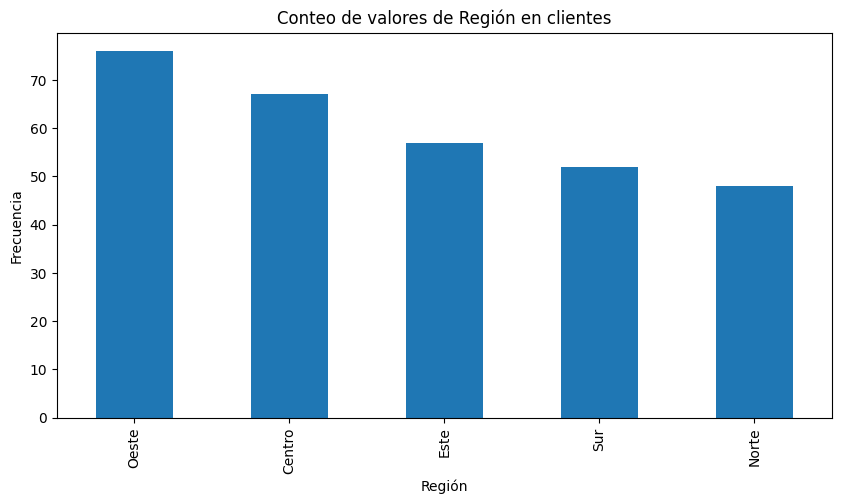

Gráfico de conteo guardado en: ../reports/figures/raw\clientes\clientes_count_Región.png
Dataset: inventario

Primeras filas:


,SKU,Nombre Producto,Stock Actual,Stock Ideal,Devoluciones (Último mes),Motivo Devolución
0,LJ-001,Crema Joven,97,231,10,No era lo esperado
1,LJ-002,Loción Joven,150,336,18,No era lo esperado
2,LJ-003,Serum Joven,219,333,5,Envase dañado
3,LP-001,Serum Profesional,181,282,7,Envase dañado
4,LP-002,Serum Profesional,57,220,17,No era lo esperado


'\n'

Descripción Estadística:


,SKU,Nombre Producto,Stock Actual,Stock Ideal,Devoluciones (Último mes),Motivo Devolución
count,8,8,8.000000,8.00000,8.000000,8
unique,8,6,NaN,NaN,NaN,2
top,LJ-001,Crema Orgánica,NaN,NaN,NaN,No era lo esperado
freq,1,2,NaN,NaN,NaN,5
mean,NaN,NaN,143.875000,260.87500,11.500000,NaN
std,NaN,NaN,62.983983,66.18683,4.869732,NaN
min,NaN,NaN,57.000000,144.00000,5.000000,NaN
25%,NaN,NaN,94.750000,228.25000,8.500000,NaN
50%,NaN,NaN,139.000000,257.00000,10.000000,NaN
75%,NaN,NaN,190.500000,315.00000,16.250000,NaN


'\n'

Información del Dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   SKU                        8 non-null      object
 1   Nombre Producto            8 non-null      object
 2   Stock Actual               8 non-null      int64 
 3   Stock Ideal                8 non-null      int64 
 4   Devoluciones (Último mes)  8 non-null      int64 
 5   Motivo Devolución          8 non-null      object
dtypes: int64(3), object(3)
memory usage: 516.0+ bytes


None

'\n'

Histograma guardado en: ../reports/figures/raw\inventario\inventario_his_Stock Actual.png


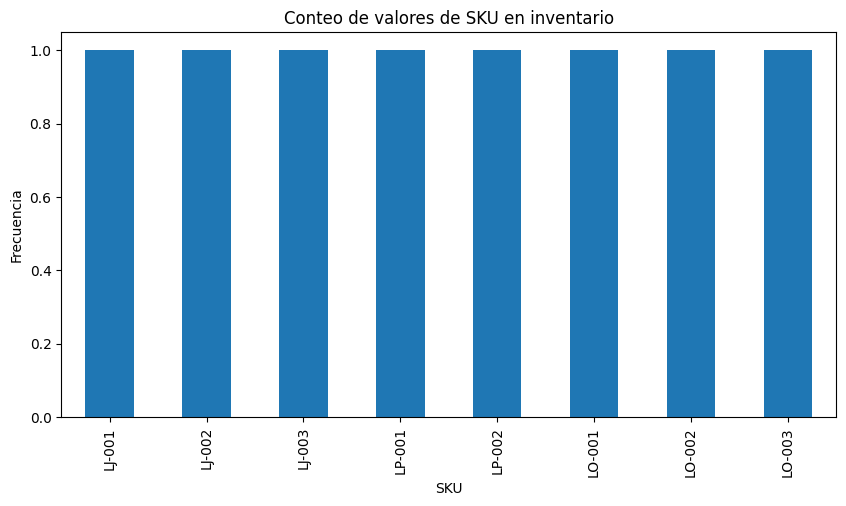

Gráfico de conteo guardado en: ../reports/figures/raw\inventario\inventario_count_SKU.png
Dataset: marketing

Primeras filas:


,Fecha,Canal,Campaña,Línea Asociada,Inversión USD,CPM,CPC,CTR (%),Conversiones
0,2024-08-08,TikTok,Ti_LJ_20s,Línea Joven,2957,201,139,57,12
1,2024-10-12,Facebook,Fa_LJ_2025,Línea Joven,2867,339,57,244,122
2,2024-06-13,TikTok,Ti_LJ_fresh,Línea Joven,2952,41,88,16,53
3,2024-11-25,Google,Go_LJ_2025,Línea Joven,4642,464,134,131,45
4,2024-07-03,Facebook,Fa_LJ_fresh,Línea Joven,2412,212,142,125,21


'\n'

Descripción Estadística:


,Fecha,Canal,Campaña,Línea Asociada,Inversión USD,CPM,CPC,CTR (%),Conversiones
count,150,150,150,150,150.000000,150.000000,150.000000,150.000000,150.000000
unique,NaN,4,12,1,NaN,NaN,NaN,NaN,NaN
top,NaN,Facebook,Fa_LJ_fresh,Línea Joven,NaN,NaN,NaN,NaN,NaN
freq,NaN,46,21,150,NaN,NaN,NaN,NaN,NaN
mean,2024-11-01 16:48:00,NaN,NaN,NaN,3234.440000,294.980000,90.293333,134.233333,54.586667
min,2024-05-05 00:00:00,NaN,NaN,NaN,503.000000,22.000000,7.000000,6.000000,2.000000
25%,2024-08-02 00:00:00,NaN,NaN,NaN,1701.250000,226.250000,64.000000,75.000000,21.250000
50%,2024-11-02 00:00:00,NaN,NaN,NaN,3495.500000,305.500000,87.000000,134.000000,43.500000
75%,2025-01-23 00:00:00,NaN,NaN,NaN,4724.000000,397.000000,127.000000,199.000000,75.000000
max,2025-04-29 00:00:00,NaN,NaN,NaN,5969.000000,494.000000,149.000000,248.000000,206.000000


'\n'

Información del Dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Fecha           150 non-null    datetime64[ns]
 1   Canal           150 non-null    object        
 2   Campaña         150 non-null    object        
 3   Línea Asociada  150 non-null    object        
 4   Inversión USD   150 non-null    int64         
 5   CPM             150 non-null    int64         
 6   CPC             150 non-null    int64         
 7   CTR (%)         150 non-null    int64         
 8   Conversiones    150 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 10.7+ KB


None

'\n'

Histograma guardado en: ../reports/figures/raw\marketing\marketing_his_Inversión USD.png


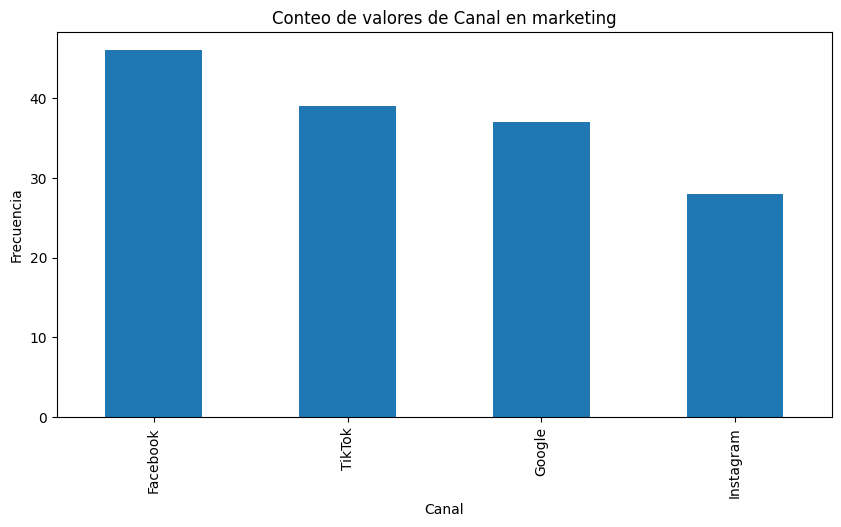

Gráfico de conteo guardado en: ../reports/figures/raw\marketing\marketing_count_Canal.png
Dataset: ventas

Primeras filas:


,Fecha,Región,Canal,Línea de Producto,SKU,Unidades Vendidas,Precio Unitario,Descuento (%),Total Ingresos
0,2024-12-27,Norte,Red de Distribución,Línea Orgánica,LO-002,21,1757,0,36897
1,2024-10-22,Oeste,Directo,Línea Joven,LJ-003,1,2013,10,1812
2,2024-09-08,Este,Red de Distribución,Línea Profesional,LP-002,15,2245,5,31991
3,2024-05-16,Centro,Directo,Línea Profesional,LP-001,1,151,15,1283
4,2025-04-04,Centro,Directo,Línea Orgánica,LO-003,5,1486,15,6315


'\n'

Descripción Estadística:


,Fecha,Región,Canal,Línea de Producto,SKU,Unidades Vendidas,Precio Unitario,Descuento (%),Total Ingresos
count,1000,1000,1000,1000,1000,1000.000000,1000.00000,1000.000000,1000.000000
unique,NaN,5,3,3,8,NaN,NaN,NaN,NaN
top,NaN,Sur,Directo,Línea Profesional,LP-001,NaN,NaN,NaN,NaN
freq,NaN,215,348,349,178,NaN,NaN,NaN,NaN
mean,2024-11-04 09:53:16.800000,NaN,NaN,NaN,NaN,15.179000,1498.19500,7.240000,19680.591000
min,2024-05-01 00:00:00,NaN,NaN,NaN,NaN,1.000000,83.00000,0.000000,129.000000
25%,2024-08-07 00:00:00,NaN,NaN,NaN,NaN,7.000000,1083.75000,0.000000,5507.250000
50%,2024-11-03 12:00:00,NaN,NaN,NaN,NaN,15.000000,1561.50000,5.000000,16146.000000
75%,2025-02-05 06:00:00,NaN,NaN,NaN,NaN,23.000000,2044.00000,10.000000,29913.750000
max,2025-04-30 00:00:00,NaN,NaN,NaN,NaN,30.000000,2499.00000,15.000000,70025.000000


'\n'

Información del Dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Fecha              1000 non-null   datetime64[ns]
 1   Región             1000 non-null   object        
 2   Canal              1000 non-null   object        
 3   Línea de Producto  1000 non-null   object        
 4   SKU                1000 non-null   object        
 5   Unidades Vendidas  1000 non-null   int64         
 6   Precio Unitario    1000 non-null   int64         
 7   Descuento (%)      1000 non-null   int64         
 8   Total Ingresos     1000 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 70.4+ KB


None

'\n'

Histograma guardado en: ../reports/figures/raw\ventas\ventas_his_Unidades Vendidas.png


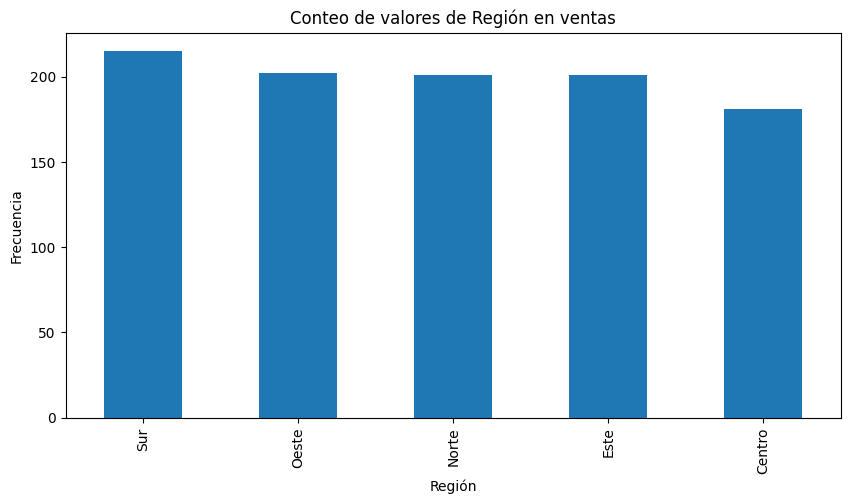

Gráfico de conteo guardado en: ../reports/figures/raw\ventas\ventas_count_Región.png
Dataset: web_data

Primeras filas:


,Fecha,Región,Campaña,Canal Origen,Página Visitada,Tiempo en Página (s),Clic en Producto,Añadir al Carrito,Compra Completada
0,2024-12-11,Este,GoogleAds_Young,GoogleAds,Línea Joven - Serum,178,0,0,0
1,2024-12-24,Norte,Instagram_YZ,Instagram,Línea Joven - Serum,124,0,0,0
2,2024-07-12,Norte,GoogleAds_Young,GoogleAds,Línea Joven - Serum,73,1,0,0
3,2024-05-09,Centro,TikTok_LJ,TikTok,Línea Joven - Crema,31,1,0,0
4,2024-10-13,Sur,TikTok_LJ,TikTok,Línea Profesional - Crema,92,0,0,0


'\n'

Descripción Estadística:


,Fecha,Región,Campaña,Canal Origen,Página Visitada,Tiempo en Página (s),Clic en Producto,Añadir al Carrito,Compra Completada
count,800,800,800,800,800,800.000000,800.000000,800.000000,800.000000
unique,NaN,5,3,3,9,NaN,NaN,NaN,NaN
top,NaN,Centro,TikTok_LJ,TikTok,Línea Profesional - Kit,NaN,NaN,NaN,NaN
freq,NaN,171,284,284,112,NaN,NaN,NaN,NaN
mean,2024-10-29 03:05:24,NaN,NaN,NaN,NaN,93.718750,0.293750,0.113750,0.053750
min,2024-05-01 00:00:00,NaN,NaN,NaN,NaN,10.000000,0.000000,0.000000,0.000000
25%,2024-07-30 00:00:00,NaN,NaN,NaN,NaN,50.000000,0.000000,0.000000,0.000000
50%,2024-10-29 12:00:00,NaN,NaN,NaN,NaN,94.500000,0.000000,0.000000,0.000000
75%,2025-01-28 06:00:00,NaN,NaN,NaN,NaN,135.000000,1.000000,0.000000,0.000000
max,2025-04-29 00:00:00,NaN,NaN,NaN,NaN,180.000000,1.000000,1.000000,1.000000


'\n'

Información del Dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Fecha                 800 non-null    datetime64[ns]
 1   Región                800 non-null    object        
 2   Campaña               800 non-null    object        
 3   Canal Origen          800 non-null    object        
 4   Página Visitada       800 non-null    object        
 5   Tiempo en Página (s)  800 non-null    int64         
 6   Clic en Producto      800 non-null    int64         
 7   Añadir al Carrito     800 non-null    int64         
 8   Compra Completada     800 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 56.4+ KB


None

'\n'

Histograma guardado en: ../reports/figures/raw\web_data\web_data_his_Tiempo en Página (s).png


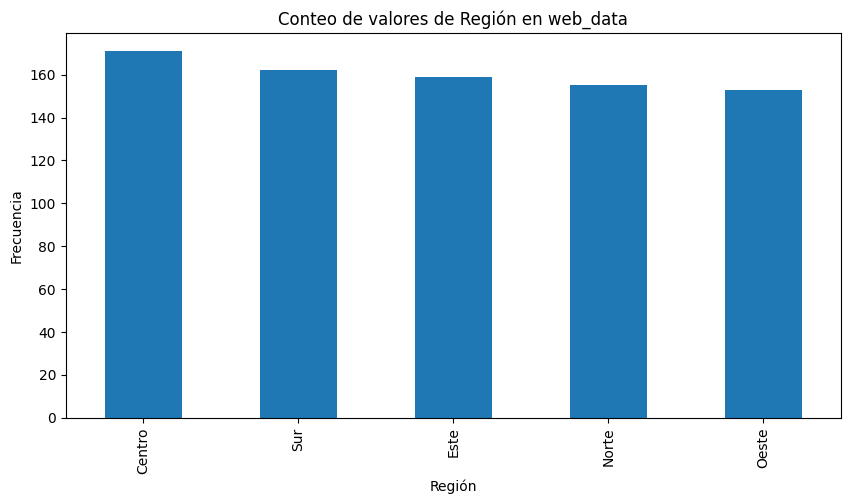

Gráfico de conteo guardado en: ../reports/figures/raw\web_data\web_data_count_Región.png

Análisis y visualizaciones completadas.


In [59]:
# Directorio para guardar las figuras
fig_base = "../reports/figures/raw"
os.makedirs(fig_base, exist_ok=True)

# Impresión de las estadísticas básicas + primeras filas + información de las columnas
for name, df in datasets.items():
    print("="*60)
    print(f"Dataset: {name}")
    print("="*60)

    print("\nPrimeras filas:")
    display(df.head(), "\n")

    print("Descripción Estadística:")
    display(df.describe(include='all'), "\n")

    print("Información del Dataframe:")
    display(df.info(), "\n")

    # Crear carpeta especifica para cada dataset
    dataset_path = os.path.join(fig_base, name)
    os.makedirs(dataset_path, exist_ok=True)

    # =============================
    # Figura 1: Histograma de la primera columna numérica disponible
    # ============================
    num_cols = df.select_dtypes(include=['number']).columns

    if len(num_cols) > 0:
        col = num_cols[0]

        plt.figure(figsize=(8, 5))
        plt.hist(df[col].dropna())
        plt.title(f'Histograma de {col} en {name}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')

        fig_path = os.path.join(dataset_path, f"{name}_his_{col}.png")
        plt.savefig(fig_path, bbox_inches='tight')
        plt.close()

        print(f"Histograma guardado en: {fig_path}")
    else:
        print(f"No hay columnas numéricas en {name} para graficar histogramas.")

    # =============================
    # Figura 2: Conteo de valores de la primera columna categórica disponible
    # ============================
    cat_cols = df.select_dtypes(include='object').columns

    if len(cat_cols) > 0:
        col = cat_cols[0]

        plt.figure(figsize=(10, 5))
        df[col].value_counts().head(10).plot(kind='bar')
        plt.title(f'Conteo de valores de {col} en {name}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')

        fig_path = os.path.join(dataset_path, f"{name}_count_{col}.png")
        plt.savefig(fig_path, bbox_inches='tight')
        plt.show()
        plt.close()

        print(f"Gráfico de conteo guardado en: {fig_path}")
    else:
        print(f"No hay columnas categóricas en {name} para graficar conteos.")

print("\nAnálisis y visualizaciones completadas.")

## 12. Matrices de Correlación

- Se calculan Correlaciones entre variables numéricas por cada dataset.
- Imprimimos la matriz en consola.
- Se guarda un heatmap en `../reports/figures/raw/<dataset>/corr_numeric.png`


Matriz de correlación (pearson) para clientes:
--------------------------------------------------------------------------------
                    Cliente ID   Edad  Satisfacción (1-5)
Cliente ID               1.000 -0.048              -0.059
Edad                    -0.048  1.000               0.046
Satisfacción (1-5)      -0.059  0.046               1.000



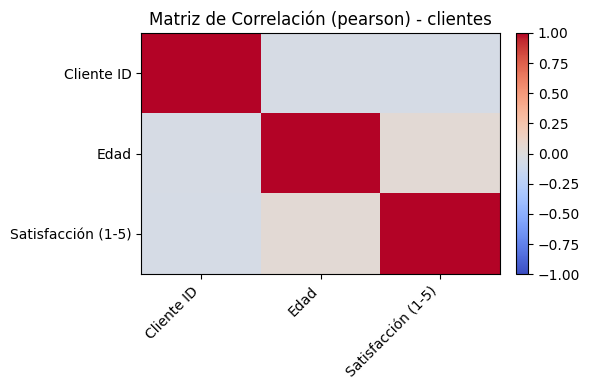

Matriz de correlación guardada en: ../reports/figures/raw\clientes\clientes_correlation_pearson.png

Matriz de correlación (pearson) para inventario:
--------------------------------------------------------------------------------
                           Stock Actual  Stock Ideal  \
Stock Actual                      1.000        0.781   
Stock Ideal                       0.781        1.000   
Devoluciones (Último mes)        -0.218        0.131   

                           Devoluciones (Último mes)  
Stock Actual                                  -0.218  
Stock Ideal                                    0.131  
Devoluciones (Último mes)                      1.000  



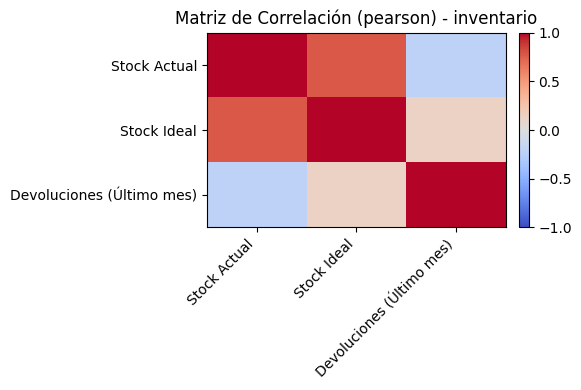

Matriz de correlación guardada en: ../reports/figures/raw\inventario\inventario_correlation_pearson.png

Matriz de correlación (pearson) para marketing:
--------------------------------------------------------------------------------
               Inversión USD    CPM    CPC  CTR (%)  Conversiones
Inversión USD          1.000  0.040 -0.086    0.137         0.658
CPM                    0.040  1.000 -0.084   -0.037         0.018
CPC                   -0.086 -0.084  1.000   -0.153        -0.374
CTR (%)                0.137 -0.037 -0.153    1.000         0.495
Conversiones           0.658  0.018 -0.374    0.495         1.000



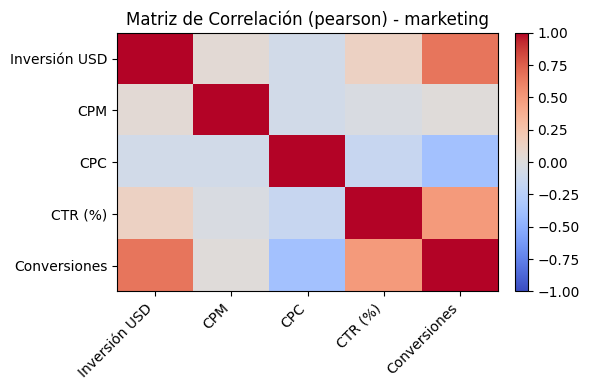

Matriz de correlación guardada en: ../reports/figures/raw\marketing\marketing_correlation_pearson.png

Matriz de correlación (pearson) para ventas:
--------------------------------------------------------------------------------
                   Unidades Vendidas  Precio Unitario  Descuento (%)  \
Unidades Vendidas              1.000           -0.007         -0.028   
Precio Unitario               -0.007            1.000         -0.048   
Descuento (%)                 -0.028           -0.048          1.000   
Total Ingresos                 0.684            0.317         -0.003   

                   Total Ingresos  
Unidades Vendidas           0.684  
Precio Unitario             0.317  
Descuento (%)              -0.003  
Total Ingresos              1.000  



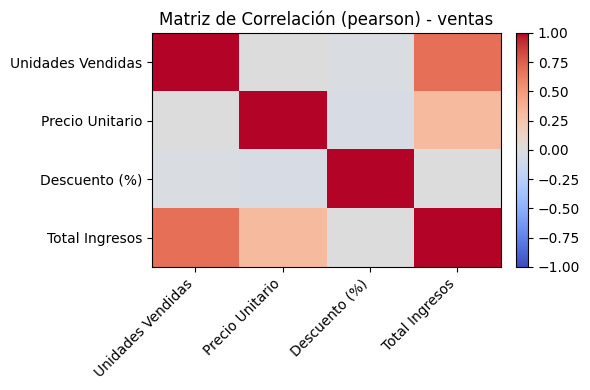

Matriz de correlación guardada en: ../reports/figures/raw\ventas\ventas_correlation_pearson.png

Matriz de correlación (pearson) para web_data:
--------------------------------------------------------------------------------
                      Tiempo en Página (s)  Clic en Producto  \
Tiempo en Página (s)                 1.000            -0.064   
Clic en Producto                    -0.064             1.000   
Añadir al Carrito                   -0.007             0.556   
Compra Completada                   -0.008             0.370   

                      Añadir al Carrito  Compra Completada  
Tiempo en Página (s)             -0.007             -0.008  
Clic en Producto                  0.556              0.370  
Añadir al Carrito                 1.000              0.665  
Compra Completada                 0.665              1.000  



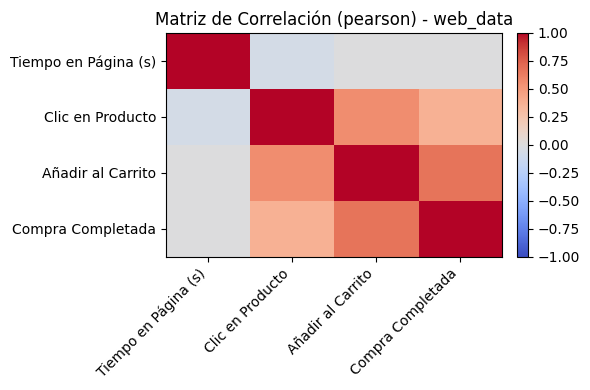

Matriz de correlación guardada en: ../reports/figures/raw\web_data\web_data_correlation_pearson.png

Cálculo de correlaciones completado.


In [60]:
fig_base = "../reports/figures/raw"
os.makedirs(fig_base, exist_ok=True)

# Función para cálculo y guardado de correlaciones
def correlacion_numerica_y_guardar(name, df, method='pearson', save=True):
    num_df = df.select_dtypes(include=['number']).copy()
    if num_df.shape[1] < 2:
        print(f"No hay suficientes columnas numéricas ({num_df.shape[1]}). Se omite la correlación")
        return None
    
    # Matriz de correlación
    corr = num_df.corr(method=method)
    print("\n" + "="*80)
    print(f"Matriz de correlación ({method}) para {name}:")
    print("-"*80)
    # Imprimir la matriz de correlación formateada
    with pd.option_context('display.float_format', '{:0.3f}'.format):
        print(corr)
    print("="*80 + "\n")

    # Guardar la figura del heatmap
    if save:
        dataset_path = os.path.join(fig_base, name)
        os.makedirs(dataset_path, exist_ok=True)

        plt.figure(figsize=(max(6, corr.shape[0] * 1.2), max(4, corr.shape[1] * 0.8)))
        im = plt.imshow(corr, vmin=-1, vmax=1, cmap='coolwarm', aspect='auto')
        plt.colorbar(im, fraction=0.046, pad=0.04)
        plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right')
        plt.yticks(range(len(corr.index)), corr.index)
        plt.title(f'Matriz de Correlación ({method}) - {name}')
        plt.tight_layout()

        fig_path = os.path.join(dataset_path, f"{name}_correlation_{method}.png")
        plt.savefig(fig_path, bbox_inches='tight')
        plt.show()
        plt.close()
        print(f"Matriz de correlación guardada en: {fig_path}")

    return corr

# Ejecutar la función para cada dataset
results_corr = {}
for name, df in datasets.items():
    corr = correlacion_numerica_y_guardar(name, df, method='pearson', save=True)
    results_corr[name] = corr

print("\nCálculo de correlaciones completado.")

## Conclusiones

Tras la carga, validación y revisión exploratoria inicial de los cinco datasets principales (`clientes`, `inventario`, `marketing`, `ventas`, y `web_data`), se destacan los siguientes puntos clave:

1. Calidad general de los datos: Excelente

- **Ninguno de los datasets presenta valores nulos**, lo cual simplifica el tratamiento posterior.
- No existen **duplicados** en ningún conjunto.
- Todas las columnas de tipo fecha fueron convertidas correctamente a formato datetime, habilitando análisis temporales.
- Los tipos de datos categóricos y numéricos están correctamente definidos.

Esto confirma que el proceso de ingestión está sólido y que los archivos fuente son consistentes.

2. Rango temporal alineado en todos los datasets

Todas las fuentes comparten un periodo temporal consistente:

- Fechas mínimas: entre mayo 2024
- Fechas máximas: entre abril 2025

Esto permite relacionar comportamientos entre marketing, web, ventas, clientes e inventario sin desfases temporales, habilitando análisis multifuente coherentes en los próximos notebooks.

3. Dataset `clientes`: Buena distribución y variabilidad

- 300 registros, con edades entre 18 y 45 años, bien distribuidas.
- Satisfacción promedio: 3.03, con variabilidad suficiente para permitir modelado.
- La distribución por Región y por Línea Usada está equilibrada.

Los comentarios contienen variedad ("Precio elevado", "No vi resultados", “Excelente producto”, etc.), lo que abre la puerta a análisis de texto o clasificación temática.

4. Dataset `inventario`: Tamaño pequeño pero muy útil

- Solo 8 productos, todos sin faltantes.
- Variación notable entre stock actual y stock ideal, lo que puede relacionarse luego con:
    - niveles de venta,
    - devoluciones,
    - comportamiento por línea de producto.

- La columnma *Motivo de Devolución* está limpia y estandarizada.

5. Dataset `marketing`: Formato consistente y métricas confiables

**150 campañas** con métricas completas.

Presenta alta variabilidad en:
- inversión,
- CPM,
- CPC,
- CTR,
- conversiones.

Esto permitirá análisis posteriores de eficiencia de campañas y su relación con ventas y tráfico web.

6. Dataset `ventas`: Dataset robusto y sin inconsistencias

- 1000 transacciones de ventas completamente registradas.
- Las métricas numéricas tienen valores coherentes:
    - Unidades vendidas: 1 a 30
    - Precios unitarios: 83 a 2499
    - Descuentos: 0% a 15%

**Total Ingresos** coincide correctamente con sus componentes.

Además, todas las líneas de producto están presentes, permitiendo análisis comparativos.

7. Dataset `web_data`: Comportamientos completos del embudo online

- 800 registros de navegación y conversiones.
- Las tasas de conversión son bajas (como es típico), pero sin valores faltantes ni columnas ruidosas.
-El tiempo en página muestra buena dispersión, lo cual permitirá definir perfiles de comportamiento.

8. Categorización y formatos verificados

Todos los datasets tienen:
-fechas convertidas correctamente,
-formatos categóricos limpios,
-valores numéricos consistentes,
- sin anomalías aparentes.

La categorización por regiones, campañas, canales y líneas de producto se encuentra lista para modelados futuros.

Conclusión Global

Los cinco datasets están limpios, completos, alineados temporalmente y correctamente tipados. No se requieren pasos adicionales de limpieza para continuar. La información se encuentra en condiciones ideales para avanzar al Notebook 02: Análisis Exploratorio (EDA), donde comenzarán las primeras visualizaciones integradas y el cruce entre fuentes.